In [1]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
weather = pd.read_csv("weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])

station = weather[weather['station_nbr'] == 7].reset_index(drop=True)

station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunrise"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunrise"].values
station.loc[(station["date"].dt.year == 2014) & (station["date"].dt.month == 1), "sunset"] = station.loc[(station["date"].dt.year == 2013)\
                                                                                            & (station["date"].dt.month == 1), "sunset"].values

In [5]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
0,7,2012-01-01,50.0,33.0,41.5,NaN,26.0,35.0,23.0,0.0,NaN,NaN,MD,0.0,0.0,29.15,30.54,10.3,32.0,10.2,2012,1,1,53.810841,35.419080,NaN,6,1,0,0,0,1
1,7,2012-01-02,44.0,26.0,35.0,NaN,17.0,29.0,30.0,0.0,NaN,NaN,MD,0.0,0.0,29.23,30.66,5.7,34.0,6.9,2012,1,2,47.434385,29.177399,NaN,0,0,0,0,0,1
2,7,2012-01-03,60.0,27.0,43.5,NaN,22.0,35.0,21.0,0.0,NaN,NaN,MD,0.0,0.0,28.84,30.30,15.7,19.0,15.9,2012,1,3,42.157580,36.070863,NaN,1,0,0,0,0,1
3,7,2012-01-04,58.0,32.0,45.0,NaN,28.0,37.0,20.0,0.0,NaN,NaN,MD,0.0,0.0,28.90,30.31,5.0,33.0,7.4,2012,1,4,51.105737,40.962292,NaN,2,0,0,0,0,1
4,7,2012-01-05,66.0,28.0,47.0,NaN,29.0,40.0,18.0,0.0,NaN,NaN,MD,0.0,0.0,28.71,30.13,12.2,20.0,12.4,2012,1,5,49.361978,41.526024,NaN,3,0,0,0,0,1


In [6]:
len(station)

1035

In [7]:
for i in station.columns:
    count_null = station[i].isna().sum()
    print(i, ":", count_null, "(",round((count_null / len(station) * 100),2),"%",")")

station_nbr : 0 ( 0.0 % )
date : 0 ( 0.0 % )
tmax : 0 ( 0.0 % )
tmin : 0 ( 0.0 % )
tavg : 0 ( 0.0 % )
depart : 1035 ( 100.0 % )
dewpoint : 0 ( 0.0 % )
wetbulb : 0 ( 0.0 % )
heat : 0 ( 0.0 % )
cool : 0 ( 0.0 % )
sunrise : 1035 ( 100.0 % )
sunset : 1035 ( 100.0 % )
codesum : 0 ( 0.0 % )
snowfall : 0 ( 0.0 % )
preciptotal : 0 ( 0.0 % )
stnpressure : 0 ( 0.0 % )
sealevel : 0 ( 0.0 % )
resultspeed : 0 ( 0.0 % )
resultdir : 3 ( 0.29 % )
avgspeed : 0 ( 0.0 % )
year : 0 ( 0.0 % )
month : 0 ( 0.0 % )
day : 0 ( 0.0 % )
relative_humility : 0 ( 0.0 % )
windchill : 0 ( 0.0 % )
daytime : 1035 ( 100.0 % )
week7 : 0 ( 0.0 % )
weekend : 0 ( 0.0 % )
code_change : 0 ( 0.0 % )
rainY : 0 ( 0.0 % )
otherY : 0 ( 0.0 % )
nothing : 0 ( 0.0 % )


In [8]:
train = pd.read_csv("train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [9]:
key = pd.read_csv("key.csv")
station = station.merge(key)

In [10]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
298363,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,107,0
298364,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,108,0
298365,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,109,0
298366,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,110,0
298367,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,111,0


In [11]:
station['log1p_units'] = np.log1p(station.units)

In [12]:
# # units가 다 0인 item_number 골라내기
# stn_real = pd.DataFrame(columns = station.columns)
# station["item_nbr"] = station["item_nbr"].astype("str")
# item_number = station.groupby("item_nbr")["units"].agg(sum)
# stn_item = item_number[item_number != 0].index
# stn_real = pd.DataFrame(columns = station.columns)
# for i in range(len(stn_item)):
#     stn_real = pd.concat([stn_real, station[station["item_nbr"] == stn_item[i]]], ignore_index=True)

## 전체 데이터로 OLS

In [13]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
298363,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,107
298364,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,108
298365,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,109
298366,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,110
298367,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,111


In [14]:
len(station)

298368

In [15]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

In [16]:
df2.to_csv("station7.csv", sep=",", index=False)

### 1. OLS : df1 (units) 

In [17]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + C(year) + C(month) + relative_humility \
                            + windchill + weekend + C(rainY) + C(item_nbr)+ 0', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     2880.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        07:14:09   Log-Likelihood:            -9.1862e+05
No. Observations:              297702   AIC:                         1.838e+06
Df Residuals:                  297527   BIC:                         1.839e+06
Df Model:                         174                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
C(resultdir)[1.0]      2.5124      2

### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [18]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year)\
                            + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     2853.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        07:15:27   Log-Likelihood:            -9.1843e+05
No. Observations:              297702   AIC:                         1.837e+06
Df Residuals:                  297525   BIC:                         1.839e+06
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [19]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

5180

In [20]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
293183,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,107,0
293184,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,108,0
293185,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,109,0
293186,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,110,0
293187,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,111,0


In [21]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed)\
                            + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     7701.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        07:16:36   Log-Likelihood:            -5.4353e+05
No. Observations:              292535   AIC:                         1.087e+06
Df Residuals:                  292358   BIC:                         1.089e+06
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

R square 약간 상승했으나, conditional number도 상승했다.

### 4. 변수변환 : df2 (log1p_units) 

In [22]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     4744.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        07:42:44   Log-Likelihood:                -35047.
No. Observations:              297702   AIC:                         7.045e+04
Df Residuals:                  297525   BIC:                         7.232e+04
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야함

### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [23]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

8174

In [24]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
290189,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,107,0.0
290190,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,108,0.0
290191,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,109,0.0
290192,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,110,0.0
290193,7,2014-10-31,58.0,38.0,48.0,NaN,32.0,41.0,17.0,0.0,NaN,NaN,MD,0.0,0.0,29.0,30.37,11.0,1.0,11.6,2014,10,31,53.694017,43.028924,NaN,4,0,0,0,0,1,28,111,0.0


In [25]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.569e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        07:43:50   Log-Likelihood:             3.4783e+05
No. Observations:              289546   AIC:                        -6.953e+05
Df Residuals:                  289369   BIC:                        -6.934e+05
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(resultdir)[1.0]       

설명력이 더 올라갔다, conditional number는 약간 낮아짐

### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [26]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.569e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:28:57   Log-Likelihood:             3.4783e+05
No. Observations:              289546   AIC:                        -6.953e+05
Df Residuals:                  289369   BIC:                        -6.934e+05
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

R^2값이 1에 가까워지고 조건수는 변화없어 과최적화가 의심

### 6 - 1. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavg/stnpressure/sealevel제거(VIF에 근거)

In [28]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.644e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:32:41   Log-Likelihood:             3.4783e+05
No. Observations:              289546   AIC:                        -6.953e+05
Df Residuals:                  289374   BIC:                        -6.935e+05
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 2. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [34]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.675e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:34:34   Log-Likelihood:             3.4783e+05
No. Observations:              289546   AIC:                        -6.953e+05
Df Residuals:                  289376   BIC:                        -6.935e+05
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 3. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환  + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/windchill제거(VIF에 근거) --> 아래 VIF부분으로 갈 것.

In [43]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(resultspeed)  \
                            + C(resultdir) + C(year) + C(month) + scale(relative_humility) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr) + 0', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 2.707e+04
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:37:37   Log-Likelihood:             3.4783e+05
No. Observations:              289546   AIC:                        -6.953e+05
Df Residuals:                  289378   BIC:                        -6.935e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(resultdir)[1.0

### 6 - 4. 변수변환 : df2 (log1p_units) + tmax/tmin/tavgsunset/sunrise/daytime/stnpressure/sealevel제거 + wetbulb/dewpoint제거+avgspeed/relative_humility제거(VIF에 근거)  + 유의하지 않은 변수 제거 -> 정규화

In [66]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~  C(weekend) \
                           + C(store_nbr) + C(item_nbr) +scale(preciptotal) ', data = df2)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     7341.
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        08:52:51   Log-Likelihood:                -35114.
No. Observations:              298368   AIC:                         7.046e+04
Df Residuals:                  298253   BIC:                         7.168e+04
Df Model:                         114                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0054      0

### F- 검정

In [67]:
sm.stats.anova_lm(model2_1_1.fit())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(weekend),1.0,2.454381,2.454381,33.115209,8.694130e-09
C(store_nbr),2.0,8.653429,4.326714,58.377266,4.487830e-26
C(item_nbr),110.0,62014.495413,563.768140,7606.520992,0.000000e+00
scale(preciptotal),1.0,0.688728,0.688728,9.292509,2.301130e-03
Residual,298253.0,22105.446009,0.074116,NaN,NaN


### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

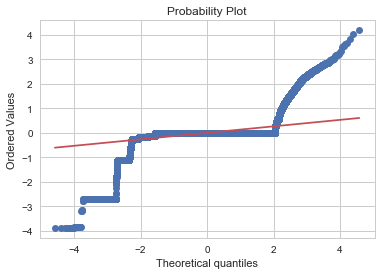

In [68]:
%matplotlib inline
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()

### 8.  다중공선성 감소시키기 : VIF

In [122]:
df2_1.columns

Index(['station_nbr', 'date', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'year', 'month', 'day', 'relative_humility', 'windchill', 'daytime', 'week7', 'weekend', 'code_change', 'rainY', 'otherY', 'nothing', 'store_nbr', 'item_nbr', 'log1p_units'], dtype='object')

In [16]:
# sampleX = df2_1.loc[:, cols]
# sampley = df2_1.loc[:,"log1p_units"]
# sns.pairplot(sampleX)
# plt.show()

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = ['tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat', 'cool',\
         'snowfall', 'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']

y = df2_1.loc[:,cols]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(y.values, i) for i in range(y.shape[1])]
vif["features"] = y.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)

vif

,VIF Factor,features
0,2.063677e+06,tavg
1,7.048362e+05,tmax
2,4.958106e+05,sealevel
3,4.932663e+05,stnpressure
4,3.584253e+05,tmin
5,6.911167e+03,windchill
6,2.187172e+03,wetbulb
7,1.931314e+03,dewpoint
8,5.047897e+02,relative_humility
9,4.666794e+01,avgspeed


tmax, tavg, tmin, stnpressure, sealevel를 빼고 df2_1을 다시 OLS돌려본다(6-1번 참조)

In [29]:
cols = ['dewpoint', 'wetbulb', 'heat', 'cool',\
         'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,1543.251619,wetbulb
1,854.648362,windchill
2,648.832490,dewpoint
3,188.231675,relative_humility
4,33.188314,avgspeed
5,20.966673,resultspeed
6,19.261490,heat
7,6.053679,cool
8,4.074080,item_nbr
9,1.175859,preciptotal


### VIF : wetbulb 버리고 다시 

In [35]:
cols = ['dewpoint', 'heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,569.232113,dewpoint
1,185.580445,windchill
2,169.462485,relative_humility
3,32.132295,avgspeed
4,20.963017,resultspeed
5,18.820912,heat
6,5.343694,cool
7,4.069433,item_nbr
8,1.174363,preciptotal
9,1.097165,snowfall


### VIF : dewpoint 버리고 다시 

In [37]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'avgspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,32.042407,avgspeed
1,23.018224,windchill
2,20.791106,resultspeed
3,16.000798,relative_humility
4,4.047567,item_nbr
5,3.669468,heat
6,3.259870,cool
7,1.174076,preciptotal
8,1.096820,snowfall


### VIF : avgspeed 버리고 다시 

In [39]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', \
        'relative_humility', 'windchill', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,20.082500,windchill
1,15.995968,relative_humility
2,4.184221,resultspeed
3,4.045421,item_nbr
4,3.483129,heat
5,3.034273,cool
6,1.153851,preciptotal
7,1.096160,snowfall


### VIF :  windchill 버리고 다시 

In [41]:
cols = ['heat', 'cool', 'snowfall', 'preciptotal', 'resultspeed', 'relative_humility', 'item_nbr']
sampleX = df2_1.loc[:, cols]
sampley = df2_1.loc[:,"log1p_units"]

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(sampleX.values, i) for i in range(sampleX.shape[1])]
vif["features"] = sampleX.columns
vif = vif.sort_values("VIF Factor", ascending=False).reset_index(drop=True)
vif

,VIF Factor,features
0,6.653547,relative_humility
1,3.692799,resultspeed
2,3.625077,item_nbr
3,2.460946,heat
4,1.873315,cool
5,1.139758,preciptotal
6,1.089464,snowfall


### 9. 정규화 후 Cross validation(교차검증)
- 6-4번 model 사용
- 순수 Ridge모형(L1_wt=0), 순수 lasso모형(L1_wt=1)

In [53]:
from patsy import dmatrix

In [52]:
# 독립변수와 종속변수로 나누기
df2_1_target = df2_1['log1p_units']
df2_1_X = df2_1.drop(columns=['log1p_units'])

In [54]:
len(df2_1_X), len(df2_1_target)

(290194, 290194)

##### scikit learn에서 적용할 때 사용하는 코드 :df2_1(log1p_units) 대상

In [69]:
formula = 'C(store_nbr) + C(weekend) + C(item_nbr) +scale(preciptotal)'
dfX = dmatrix(formula, df2_1_X, return_type='dataframe')
dfy = pd.DataFrame(df2_1_target, columns=["log1p_units"])

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

model = LinearRegression()
cv = KFold(10, shuffle=True, random_state=0)

scores = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[i] = r2_score(y_test, y_pred)

scores

array([0.94023742, 0.93508884, 0.9472527 , 0.93558117, 0.93877359,
       0.94133061, 0.92859165, 0.94999422, 0.94250961, 0.93305184])

In [71]:
# Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores1 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0)
    y_pred = model.predict(X_test)
    scores1[i] = r2_score(y_test, y_pred)

scores1

array([0.09201136, 0.09293317, 0.09452191, 0.0927572 , 0.09511911,
       0.09078991, 0.09529425, 0.09279275, 0.09472836, 0.09448   ])

In [72]:
# Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores2 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=1)
    y_pred = model.predict(X_test)
    scores2[i] = r2_score(y_test, y_pred)

scores2

array([-0.00638821, -0.00702513, -0.00640432, -0.00633049, -0.00699118,
       -0.00705475, -0.00599919, -0.0072593 , -0.00632603, -0.00678365])

In [73]:
# Elasic net
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

cv = KFold(10, shuffle=True, random_state=0)

scores3 = np.zeros(10)
for i, (train_index, test_index) in enumerate(cv.split(dfX)):
    X_train = dfX.values[train_index]
    y_train = dfy.values[train_index]
    X_test = dfX.values[test_index]
    y_test = dfy.values[test_index]
    model = sm.OLS(y_train, X_train)
    model = model.fit_regularized(alpha=0.1, L1_wt=0.5)
    y_pred = model.predict(X_test)
    scores3[i] = r2_score(y_test, y_pred)

scores3

array([-0.00638821, -0.00702513, -0.00640432, -0.00633049, -0.00699118,
       -0.00705475, -0.00599919, -0.0072593 , -0.00632603, -0.00678365])

### station 평균성능

In [74]:
scores.mean(), scores1.mean(), scores2.mean(), scores3.mean()

(0.9392411643264073,
 0.09354280198670797,
 -0.006656224563186286,
 -0.006656224563186286)